<a href="https://colab.research.google.com/github/niraj8763/Deep-Learning/blob/master/Classifying_movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMDB dataset

loading the IMDB dataset

In [0]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [0]:
train_labels[0]

1

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


Encoding the integer sequences into a binary matrix

In [0]:
import numpy as np
def vectorize_sequence(sequence,dimension=10000):
  results = np.zeros((len(sequence),dimension))
  for i, sequence in enumerate(sequence):
    results[i,sequence] = 1.
  return results

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The model definition

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Compiling the model

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Configuring the optimizer

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

Using custom losses and metrics

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

Setting aside a validation set

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training your model

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [0]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 187us/step - loss: 0.5338 - acc: 0.7727 - val_loss: 0.4048 - val_acc: 0.8593
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3206 - acc: 0.8992 - val_loss: 0.3200 - val_acc: 0.8759
Epoch 3/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.2310 - acc: 0.9237 - val_loss: 0.2776 - val_acc: 0.8917
Epoch 4/20
15000/15000 [==============================] - 1s 94us/step - loss: 0.1821 - acc: 0.9406 - val_loss: 0.2761 - val_acc: 0.8882
Epoch 5/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1477 - acc: 0.9519 - val_loss: 0.2786 - val_acc: 0.8892
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1203 - acc: 0.9617 - val_loss: 0.2907 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.1008 - acc: 0.9689 - val_loss: 0.3157 - val_ac

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Plotting the training and validation loss

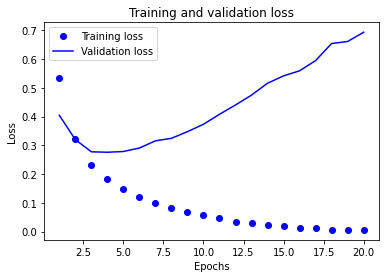

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
acc=history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 Plotting the training and validation accuracy

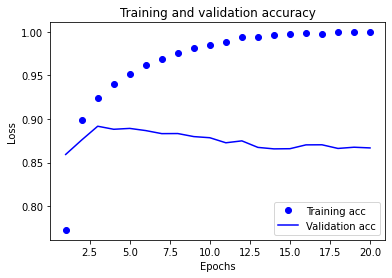

In [0]:
plt.clf()
acc_values = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Retraining a model from scratch

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.4520 - accuracy: 0.8267
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2587 - accuracy: 0.9089
Epoch 3/4
25000/25000 [==============================] - 2s 67us/step - loss: 0.2007 - accuracy: 0.9282
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step


In [0]:
results

[0.29063902362823485, 0.8852800130844116]

Using a trained network to generate predictions on new data

In [0]:
model.predict(x_test)

array([[0.16310397],
       [0.9997614 ],
       [0.86880744],
       ...,
       [0.09046462],
       [0.08618748],
       [0.61906314]], dtype=float32)